# Imports

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring data

### Reading data

In [87]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [71]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cleaning

In [88]:
train = train.drop(columns=['Ticket','Cabin','Name','PassengerId'])

In [56]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,3
1,1,1,0,38,1,0,71.2833,1
2,1,3,0,26,0,0,7.9250,3
3,1,1,0,35,1,0,53.1000,3
4,0,3,1,35,0,0,8.0500,3


In [89]:
train = train.dropna()

In [90]:
train['Sex'] = train['Sex'].map({'male':1,'female':0})

In [91]:
# Cherbourg=1  Queenstown=2  Southampton=3
train['Embarked'] = train['Embarked'].map({'C':1, 'Q':2, 'S':3}).astype('int')


In [92]:
train['Age'] = train['Age'].round().astype('int')

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    int64  
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 50.1 KB


### Visualization

<Axes: >

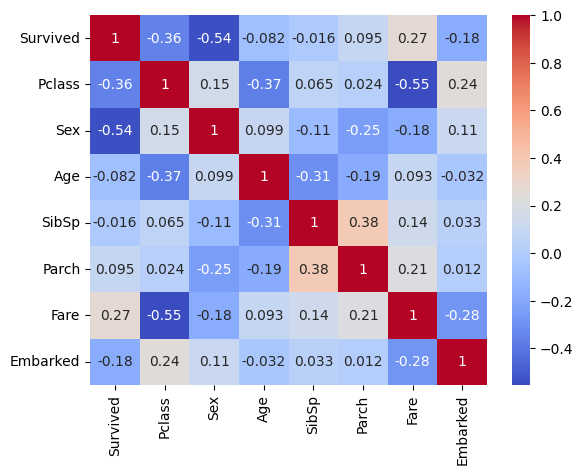

In [94]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Count'>

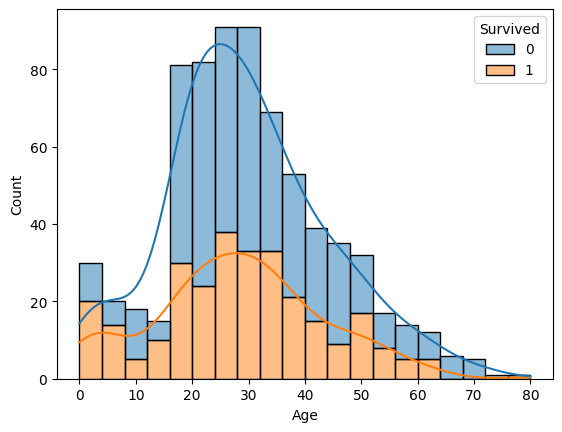

In [95]:
sns.histplot(train, x='Age', hue = 'Survived', multiple='stack',kde=True)

# Training on 1 feature

### Sex

In [98]:
women = train.loc[train['Sex'] == 0]['Survived']
women_rate = sum(women)/len(women)
men = train.loc[train['Sex'] == 1]['Survived']
men_rate = sum(men)/len(men)
print(f'Women Survival Rate: {women_rate}\nMen Survival Rate: {men_rate}')

Women Survival Rate: 0.752895752895753
Men Survival Rate: 0.2052980132450331


In [99]:
x = pd.DataFrame(train['Sex'])
y = pd.DataFrame(train['Survived'])

In [101]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [102]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
model = LogisticRegression()

In [105]:
model.fit(x_train,y_train.values.reshape(-1))

LogisticRegression()

In [106]:
y_pred = model.predict(x_test)

In [107]:
accuracy = accuracy_score(y_test ,y_pred)

In [108]:
print(accuracy)

0.7482517482517482


### Fare

In [112]:
x = pd.DataFrame(train['Fare'])
y = pd.DataFrame(train['Survived'])

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [114]:
y_train = y_train.to_numpy().reshape(-1)

In [115]:
y_train.shape

(569,)

In [116]:
model.fit(x_train,y_train)

LogisticRegression()

In [117]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
print(accuracy)

0.6363636363636364


# Training on multiple features